# COVID-19 Vaccines Administered Worldwide
---
This is the first notebook in a series of notebooks that will primarily focus on Exploratory Data Analysis and creating a baseline model.

## Libraries

In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', 55)

## OWID:  Vaccine Dataset

This dataset a wide array of information and demographic regarding the COVID-19 vaccine.

Data downloaded from Our World in Data here: 

[Our World in Data Coronavirus Vaccine site](https://ourworldindata.org/covid-vaccinations)

In [2]:
owid_df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
owid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76411 entries, 0 to 76410
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               76411 non-null  object 
 1   continent                              72660 non-null  object 
 2   location                               76411 non-null  object 
 3   date                                   76411 non-null  object 
 4   total_cases                            75112 non-null  float64
 5   new_cases                              75110 non-null  float64
 6   new_cases_smoothed                     74109 non-null  float64
 7   total_deaths                           65813 non-null  float64
 8   new_deaths                             65971 non-null  float64
 9   new_deaths_smoothed                    74109 non-null  float64
 10  total_cases_per_million                74703 non-null  float64
 11  ne

In [4]:
owid_df.isna().sum()

iso_code                          0
continent                      3751
location                          0
date                              0
total_cases                    1299
                              ...  
male_smokers                  22117
handwashing_facilities        41204
hospital_beds_per_thousand    12248
life_expectancy                3806
human_development_index        6329
Length: 59, dtype: int64

Column descriptions for this dataset

https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [5]:
owid_df.head(15).T

0            1            2   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-02-24   2020-02-25   2020-02-26   
total_cases                         1.0          1.0          1.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     3            4            5   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-02-27   2020-02-28   2020-02-29   
total_cases                         1.0          1.0          1.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     6            7            8   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-03-01   2020-03-02   2020-03-03   
total_cases                         1.0          1.0          2.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     9            10           11  \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-03-04   2020-03-05   2020-03-06   
total_cases                         4.0          4.0          4.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     12           13           14  
iso_code                            AFG          AFG          AFG  
continent                          Asia         Asia         Asia  
location                    Afghanistan  Afghanistan  Afghanistan  
date                         2020-03-07   2020-03-08   2020-03-09  
total_cases                         4.0          5.0          7.0  
...                                 ...          ...          ...  
male_smokers                        NaN          NaN          NaN  
handwashing_facilities           37.746       37.746       37.746  
hospital_beds_per_thousand          0.5          0.5          0.5  
life_expectancy                   64.83  

In [6]:
owid_df.values

array([['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ...,
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571]],
      dtype=object)

In [7]:
owid_df.describe().T

count          mean           std  \
total_cases                            75112.0  6.794412e+05  4.760392e+06   
new_cases                              75110.0  5.222050e+03  3.246308e+04   
new_cases_smoothed                     74109.0  5.228126e+03  3.213172e+04   
total_deaths                           65813.0  1.990863e+04  1.167840e+05   
new_deaths                             65971.0  1.324322e+02  7.240436e+02   
new_deaths_smoothed                    74109.0  1.167888e+02  6.623443e+02   
total_cases_per_million                74703.0  8.101252e+03  1.587834e+04   
new_cases_per_million                  74701.0  6.812939e+01  1.700572e+02   
new_cases_smoothed_per_million         73705.0  6.797458e+01  1.434214e+02   
total_deaths_per_million               65417.0  1.887367e+02  3.348314e+02   
new_deaths_per_million                 65575.0  1.409911e+00  3.873018e+00   
new_deaths_smoothed_per_million        73705.0  1.240187e+00  2.798584e+00   
reproduction_rate                      61662.0  1.016802e+00  3.459691e-01   
icu_patients                            7930.0  1.001183e+03  3.078024e+03   
icu_patients_per_million                7930.0  2.333120e+01  2.597271e+01   
hosp_patients                           9550.0  4.642878e+03  1.265064e+04   
hosp_patients_per_million               9550.0  1.565589e+02  1.932664e+02   
weekly_icu_admissions                    697.0  2.572411e+02  5.397132e+02   
weekly_icu_admissions_per_million        697.0  1.915969e+01  3.447674e+01   
weekly_hosp_admissions                  1224.0  3.785282e+03  1.168413e+04   
weekly_hosp_admissions_per_million      1224.0  1.094469e+02  2.291170e+02   
new_tests                              34911.0  3.900823e+04  1.505437e+05   
total_tests                            34670.0  4.898907e+06  2.278324e+07   
total_tests_per_thousand               34670.0  1.801465e+02  3.793377e+02   
new_tests_per_thousand                 34911.0  1.606851e+00  4.552197e+00   
new_tests_smoothed                     39917.0  3.739737e+04  1.378467e+05   
new_tests_smoothed_per_thousand        39917.0  1.523643e+00  3.610968e+00   
positive_rate                          38602.0  8.805969e-02  9.905605e-02   
tests_per_case                         38013.0  1.631265e+02  8.848864e+02   
total_vaccinations                      5062.0  7.840636e+06  3.086908e+07   
people_vaccinated                       4549.0  5.445369e+06  1.936619e+07   
people_fully_vaccinated                 3044.0  2.630500e+06  8.760921e+06   
new_vaccinations                        4320.0  2.952445e+05  1.082770e+06   
new_vaccinations_smoothed               7704.0  1.688397e+05  6.889164e+05   
total_vaccinations_per_hundred          5062.0  8.110687e+00  1.634851e+01   
people_vaccinated_per_hundred           4549.0  5.840257e+00  1.058341e+01   
people_fully_vaccinated_per_hundred     3044.0  3.257365e+00  7.284457e+00   
new_vaccinations_smoothed_per_million   7704.0  2.447396e+03  4.105825e+03   
stringency_index                       65057.0  5.882362e+01  2.194675e+01   
population                             75993.0  1.304798e+08  6.963114e+08   
population_density                     71318.0  3.375653e+02  1.646421e+03   
median_age                             69286.0  3.054690e+01  9.113509e+00   
aged_65_older                          68490.0  8.789810e+00  6.233691e+00   
aged_70_older                          68896.0  5.569984e+00  4.257179e+00   
gdp_per_capita                         69527.0  1.913679e+04  1.975325e+04   
extreme_poverty                        47442.0  1.328876e+01  1.992111e+01   
cardiovasc_death_rate                  70137.0  2.572825e+02  1.185625e+02   
diabetes_prevalence                    71047.0  7.800734e+00  3.946077e+00   
female_smokers                         55104.0  1.053605e+01  1.040581e+01   
male_smokers                           54294.0  3.265292e+01  1.346944e+01   
handwashing_facilities                 35207.0  5.098588e+01  3

In [8]:
owid_df.nunique()

iso_code                        215
continent                         6
location                        215
date                            446
total_cases                   39765
                              ...  
male_smokers                    124
handwashing_facilities           95
hospital_beds_per_thousand      100
life_expectancy                 191
human_development_index         151
Length: 59, dtype: int64

In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(owid_df, title="Pandas Profiling Report")

In [11]:
# profile

## Fully Vaccinated Data EDA

In [12]:
fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')

In [13]:
fully_vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   3326 non-null   object
 1   Code                     2635 non-null   object
 2   Day                      3326 non-null   object
 3   people_fully_vaccinated  3326 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 104.1+ KB


In [14]:
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])
# fully_vax_df.head()
fully_vax_df.isnull().sum()

Entity                       0
Code                       691
Day                          0
people_fully_vaccinated      0
dtype: int64

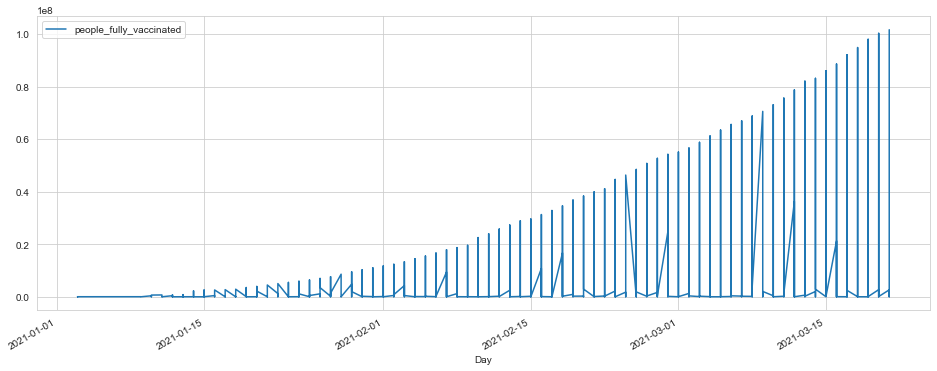

In [15]:
fully_vax_ts = fully_vax_df.copy()
fully_vax_ts.set_index('Day', inplace= True)

# quick and dirty time series plot
fully_vax_ts.plot(figsize= (16,6));

### Time Series plot of Fully Vaccinated People Worldwide

In [16]:
world_df = fully_vax_ts.where(fully_vax_ts['Entity'] == 'World')
world_df.dropna(inplace= True)
world_df.drop(['Code', 'Entity'], axis= 1, inplace= True)

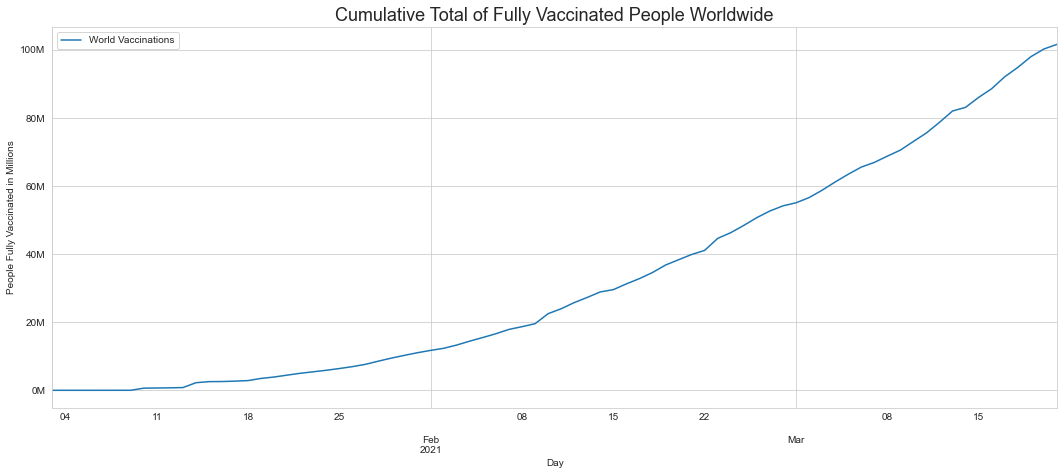

In [17]:
# Change format of y labels to millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
world_df.plot(figsize= (18, 7), ax= ax)
plt.legend(['World Vaccinations'], fancybox= True)
plt.title('Cumulative Total of Fully Vaccinated People Worldwide', fontsize= 18)
plt.ylabel('People Fully Vaccinated in Millions')
plt.show()

### Plots of Fully Vaccinated People

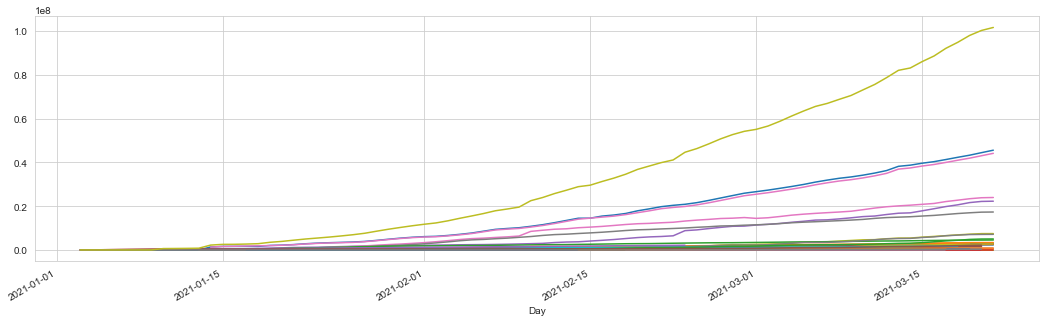

In [18]:
# plot fully vaccinated people in all countries
fig, ax = plt.subplots()
fully_vax_df.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', 
                                    ax= ax, legend= False, figsize= (18,5));

Not a very helpful plot. Not sure which country is which.

In [19]:
countries_df = fully_vax_df.copy()
countries_df.head()

Entity Code        Day  people_fully_vaccinated
0  Africa  NaN 2021-02-03                        5
1  Africa  NaN 2021-02-04                        5
2  Africa  NaN 2021-02-05                        5
3  Africa  NaN 2021-02-06                     1586
4  Africa  NaN 2021-02-08                     3980

In [20]:
countries_df.sort_values(by= ['people_fully_vaccinated'], 
                         ascending= False, inplace= True)

In [21]:
# which countries do we have?
countries_df.Entity.unique()

array(['World', 'North America', 'United States', 'Europe', 'Asia',
       'European Union', 'India', 'South America', 'Turkey', 'Israel',
       'Brazil', 'Germany', 'Chile', 'Russia', 'Africa', 'Italy',
       'France', 'Morocco', 'Indonesia', 'United Kingdom',
       'United Arab Emirates', 'Spain', 'Poland', 'England', 'Serbia',
       'Romania', 'Mexico', 'Canada', 'Argentina', 'Netherlands',
       'Hungary', 'Greece', 'Portugal', 'Belgium', 'Switzerland',
       'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark', 'Norway',
       'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belaru

In [22]:
# create dataframe with just one day of data
day = countries_df[countries_df['Day'] == '2021-03-20']

# create list of UK countries and filter out everything else
UK_countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']
day = day[day.Entity.isin(UK_countries)]
day.people_fully_vaccinated.sum()

2228772

Not everything in here is a country. Some are continents, there is also the European Union and "World". Let's remove those and get just the countries.

In [23]:
# see if that total matches with the UK # of ppl vaccinated
countries_df[(countries_df['Entity'] == 'United Kingdom') & \
             (countries_df['Day'] == '2021-03-20')]

Entity Code        Day  people_fully_vaccinated
3115  United Kingdom  GBR 2021-03-20                  2228772

So U.K. is just the sum of countries Wales, Northern Ireland, England, and Scotland. We can remove United Kingdom from the analysis to avoid duplication.

In [24]:
# create list of things that are not countries 
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'World', 'United Kingdom']

In [25]:
countries_df = countries_df[~countries_df['Entity'].isin(continents)]

In [26]:
countries_df.Entity.unique()

array(['United States', 'India', 'Turkey', 'Israel', 'Brazil', 'Germany',
       'Chile', 'Russia', 'Italy', 'France', 'Morocco', 'Indonesia',
       'United Arab Emirates', 'Spain', 'Poland', 'England', 'Serbia',
       'Romania', 'Mexico', 'Canada', 'Argentina', 'Netherlands',
       'Hungary', 'Greece', 'Portugal', 'Belgium', 'Switzerland',
       'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark', 'Norway',
       'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belarus', 'Monaco',
       'Guernsey', 'Jersey', 'Faeroe Islands', 'Andorra', 'Greenland',
       'Equatorial Guinea', 'Albania

In [27]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 3178 to 3042
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2768 non-null   object        
 1   Code                     2486 non-null   object        
 2   Day                      2768 non-null   datetime64[ns]
 3   people_fully_vaccinated  2768 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 108.1+ KB


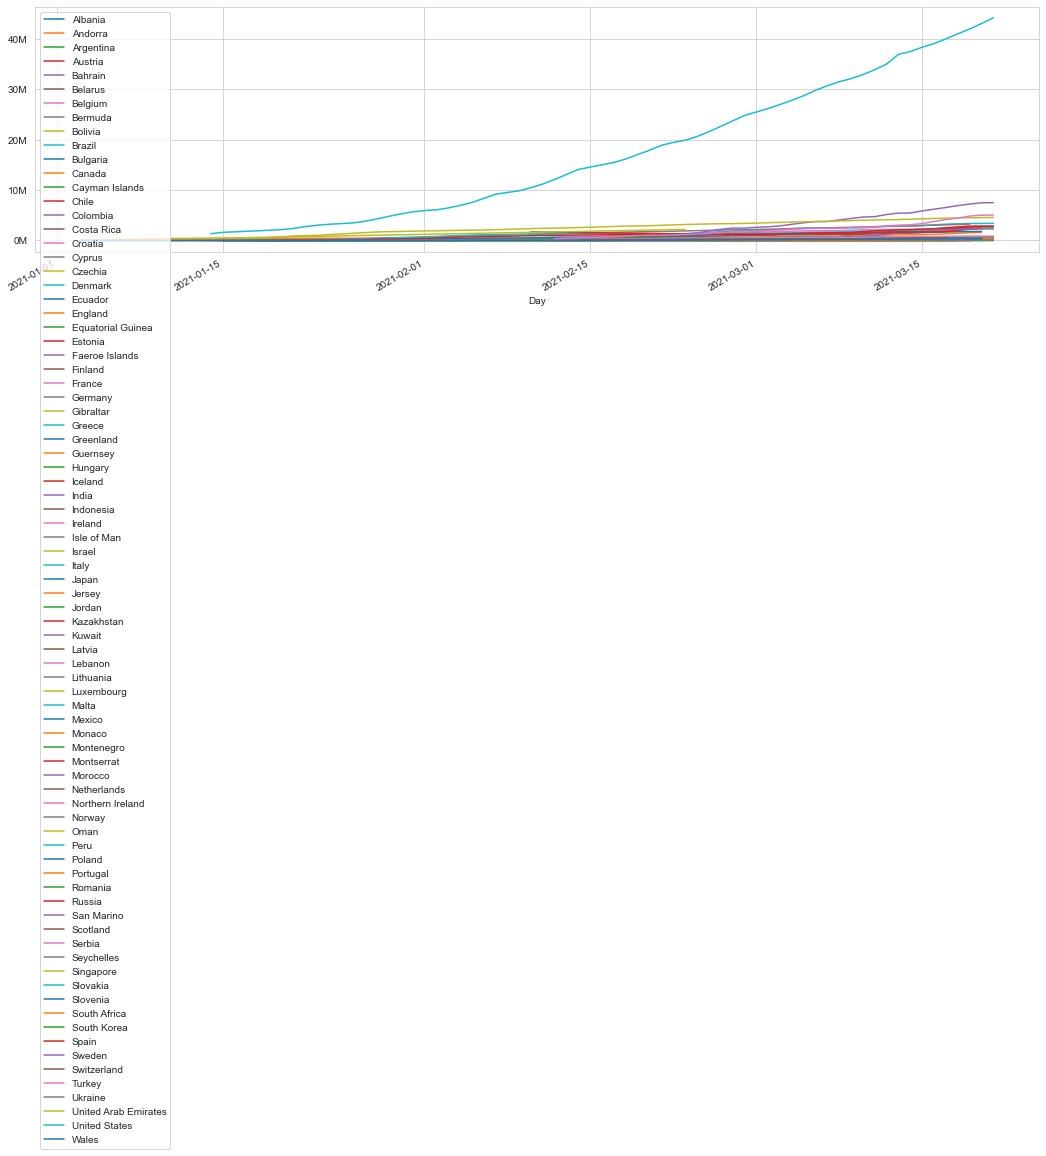

In [28]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in countries_df.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), label= country);

Still not great. While we can now see the labels, it still is not very clear because there are too many countries. A way to segment them easily that could be useful later would be grouping them by their respective incomes.

To do this, we will need to know which category they are in, provided by the World Bank Group.
For more information on the way countries were classified, visit their [blog post here.](https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021)

### Segment Data by Country's Income Group

In [29]:
# open file from World Bank that contains data on income classifications
country_incomes = pd.read_csv('../data/list-of-economies.csv', 
                              header= 4, index_col= False)
country_incomes = country_incomes.copy()
country_incomes

Unnamed: 0                                     Economy Code  \
0           1.0                                 Afghanistan  AFG   
1           2.0                                     Albania  ALB   
2           3.0                                     Algeria  DZA   
3           4.0                              American Samoa  ASM   
4           5.0                                     Andorra  AND   
..          ...                                         ...  ...   
261        42.0                          Sub-Saharan Africa  SSF   
262        43.0  Sub-Saharan Africa (excluding high income)  SSA   
263        44.0             Sub-Saharan Africa (IDA & IBRD)  TSS   
264        45.0                         Upper middle income  UMC   
265        46.0                                       World  WLD   

                         Region         Income group Lending category Other  
0                    South Asia           Low income              IDA  HIPC  
1         Europe & Central Asia  Upper middle income             IBRD   NaN  
2    Middle East & North Africa  Lower middle income             IBRD   NaN  
3           East Asia & Pacific  Upper middle income               ..   NaN  
4         Europe & Central Asia          High income               ..   NaN  
..                          ...                  ...              ...   ...  
261                         NaN                  NaN              NaN   NaN  
262                         NaN                  NaN              NaN   NaN  
263                         NaN                  NaN              NaN   NaN  
264                         NaN                  NaN              NaN   NaN  
265                         NaN                  NaN              NaN   NaN  

[266 rows x 7 columns]

In [30]:
# check names of columns
country_incomes.columns

Index(['Unnamed: 0', 'Economy', 'Code', 'Region', 'Income group',
       'Lending category', 'Other'],
      dtype='object')

In [31]:
# check null / NaN values
country_incomes.isna().sum()

Unnamed: 0            2
Economy               2
Code                  2
Region               48
Income group         48
Lending category     48
Other               208
dtype: int64

In [32]:
# drop unnecessary / mostly empty columns
country_incomes.drop(columns= ['Unnamed: 0', 'Other'], inplace= True)
# country_incomes

Bottom of DataFrame seems to be something different than the top of the DataFrame. Let's take a look. Again, all we want to see are the country names.

In [33]:
# see some of the last rows
country_incomes.Economy[210:250]

210                                              Vanuatu
211                                        Venezuela, RB
212                                              Vietnam
213                                Virgin Islands (U.S.)
214                                   West Bank and Gaza
215                                          Yemen, Rep.
216                                               Zambia
217                                             Zimbabwe
218                                                  NaN
219                                                  NaN
220                                           Arab World
221                               Caribbean small states
222                       Central Europe and the Baltics
223                           Early-demographic dividend
224                                  East Asia & Pacific
225          East Asia & Pacific (excluding high income)
226                     East Asia & Pacific (IDA & IBRD)
227                            

It looks like after the last countries there is another table that we do not need. We can remove all of that and only keep the countries and their data.

In [34]:
# subset data and check it worked
country_incomes = country_incomes.iloc[:218]
country_incomes.tail()

Economy Code                      Region  \
213  Virgin Islands (U.S.)  VIR   Latin America & Caribbean   
214     West Bank and Gaza  PSE  Middle East & North Africa   
215            Yemen, Rep.  YEM  Middle East & North Africa   
216                 Zambia  ZMB          Sub-Saharan Africa   
217               Zimbabwe  ZWE          Sub-Saharan Africa   

            Income group Lending category  
213          High income               ..  
214  Lower middle income               ..  
215           Low income              IDA  
216  Lower middle income              IDA  
217  Lower middle income            Blend

In [35]:
country_incomes.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [36]:
# merge dataframes
countries_all = pd.merge(countries_df, country_incomes, how= 'left', on= 'Code')
countries_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2768 non-null   object        
 1   Code                     2486 non-null   object        
 2   Day                      2768 non-null   datetime64[ns]
 3   people_fully_vaccinated  2768 non-null   int64         
 4   Economy                  2472 non-null   object        
 5   Region                   2472 non-null   object        
 6   Income group             2472 non-null   object        
 7   Lending category         2472 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 194.6+ KB


In [37]:
# Income group must be filled in
# See which countries have null income group 
null_vals = countries_all[countries_all.isnull().any(axis= 1)]
null_vals.Entity.unique()

array(['England', 'Wales', 'Scotland', 'Northern Ireland', 'Guernsey',
       'Jersey', 'Montserrat'], dtype=object)

Information about how incomes were determined for null value countries can be [found here](https://www.smithsonianmag.com/smart-news/whats-difference-between-england-britain-and-uk-180959558/)

England, Wales, Scotland, and Northern Ireland are all countries within the country of the United Kingdom. 

Bailiwick of Guernsey, Bailiwick of Jersey and Montserrat are all still under some form of British control and are therefore, included in the same classification of U.K. This was double-checked by looking at the classification of similar territories, such as the Isle of Man and the Cayman Islands.

In [38]:
# fill null values with "High income" - see above for reasoning
countries_all['Income group'].fillna('High income', inplace= True)
# countries_all.info()

Now let's take a look at how the countries are balanced.

#### Check Balance of Countries in Income Groups

In [39]:
# only going to look at one more recent day
date = countries_all[countries_all['Day'] == '2021-03-20']

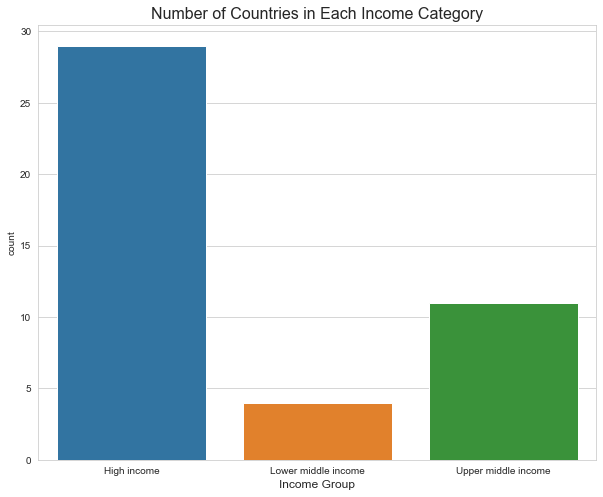

In [40]:
# plot counts
plt.figure(figsize= (10, 8))
sns.countplot(x = 'Income group', data= date)
plt.title('Number of Countries in Each Income Category', fontsize= 16)
plt.xlabel('Income Group', fontsize= 12);

#### Inequities of Vaccination Status by Income Group

In [73]:
# get updated data for inequity plot
vaccines_one = pd.read_csv('../data/share-people-vaccinated-covid.csv')

In [74]:
countries = vaccines_one.Code.unique()
countries

array(['AFG', nan, 'ALB', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BTN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'KHM', 'CAN',
       'CPV', 'CYM', 'CHL', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE',
       'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'EST', 'SWZ', 'FRO',
       'FLK', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GUY', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNE', 'MSR',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NLD', 'NZL', 'NGA', 'MKD', 'OWID_CYN',
       'NOR', 'OMN', 'PAK', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'SHN', 'KNA', 'LCA',
     

In [75]:
# create list to hold values of have or have not vaccinated 
vax_vals = []

for i in country_incomes.Code.loc[:]:
    if i in countries:
        vax_vals.append(1)
    else: 
        vax_vals.append(0)

In [76]:
# check to make sure corrent amount of values are in list
len(vax_vals)

218

In [77]:
# create column with values for each country
country_incomes['Vaccinated'] = vax_vals

<ipython-input-77-687a29a9cd65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_incomes['Vaccinated'] = vax_vals


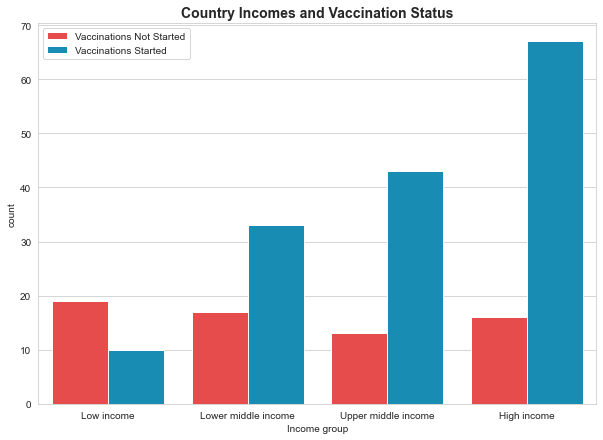

In [80]:
# plot 
order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
colors = ['#ff3333', '#0099cc']

plt.figure(figsize= (10, 7))
sns.countplot(x= 'Income group', data= country_incomes, hue= 'Vaccinated', order= order, palette= colors)
plt.title("Country Incomes and Vaccination Status", fontsize= 14, fontweight= 'bold')
plt.legend(labels= ['Vaccinations Not Started', 'Vaccinations Started'], loc= 'upper left');


Here we can see there are a lot more high income countries that have started vaccinations. As the income of the country decreases, the number of countries that have started vaccinating decreases as well.

It will be imperative for wealthier countries to help supply other countries with vaccines if we are to resume international trade and travel.

In [81]:
country_incomes['Income group'].value_counts()

High income            83
Upper middle income    56
Lower middle income    50
Low income             29
Name: Income group, dtype: int64

In [82]:
# this is from older data with income group on it
#***
date['Income group'].value_counts()

High income            29
Upper middle income    11
Lower middle income     4
Name: Income group, dtype: int64

#### Inspect Incomes Separately

In [49]:
high_inc = countries_all[countries_all['Income group'] == 'High income']

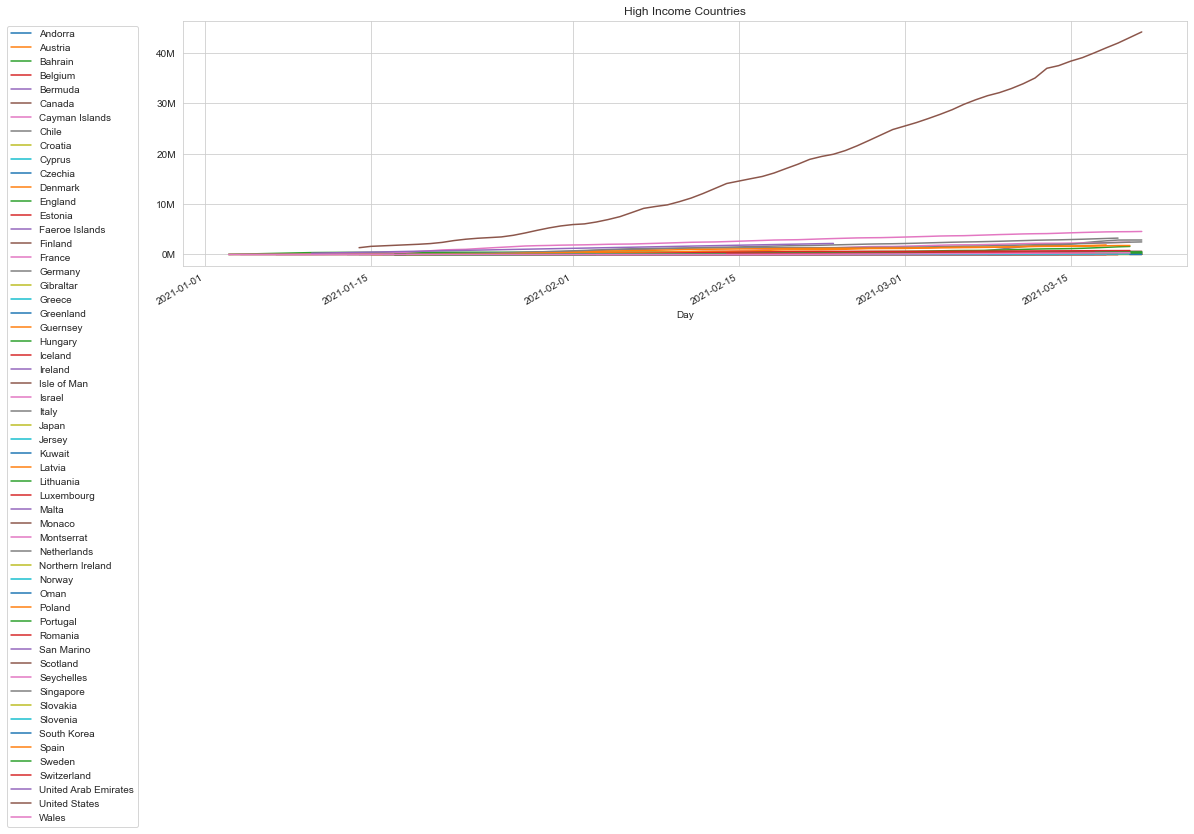

In [50]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in high_inc.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), label= country)
    
plt.title('High Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.18, 1]);

In [51]:
up_mid = countries_all[countries_all['Income group'] == 'Upper middle income']

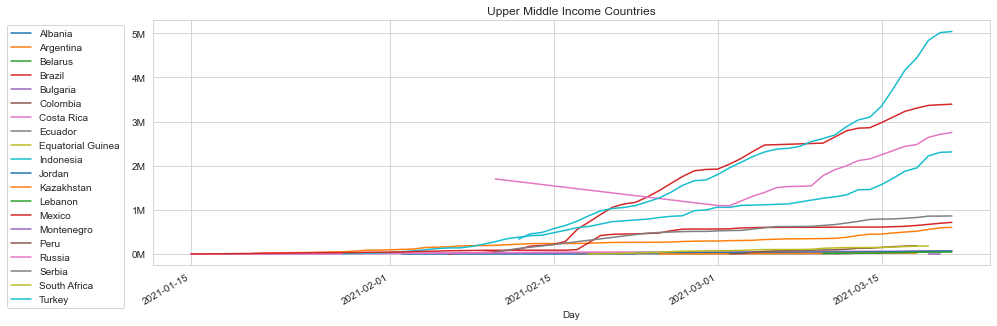

In [52]:
# plot vaccinations by income group
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in up_mid.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (15,5), label= country)
    
plt.title('Upper Middle Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.18, 1]);

In [53]:
low_mid = countries_all[countries_all['Income group'] == 'Lower middle income']

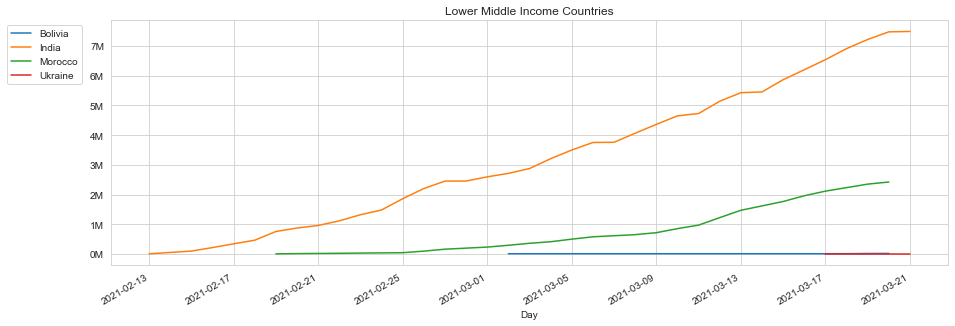

In [54]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in low_mid.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (15,5), label= country)
    
plt.title('Lower Middle Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.13, 1]);

We can see from the three plots that 
* most high income countries started recording fully vaccinated people in January
* Upper middle income countries had fully vaccinated people mid-January, but most saw progress start in February
* Lower middle income countries had fully vaccinated people starting mid-February. Two of the countries didn't have any until March, and their rates are not rising as rapidly as other countries.

In [55]:
low_mid.groupby('Entity')['people_fully_vaccinated'].max()

Entity
Bolivia      18572
India      7491696
Morocco    2423380
Ukraine          1
Name: people_fully_vaccinated, dtype: int64

I am unsure if the numbers for Ukraine are accurate or not, but some research suggests they might be.

Read [this article in The New York Times](https://www.nytimes.com/2021/03/11/world/ukraine-covid-vaccine-misinformation.html) for more information on why Ukraine's numbers are so low. The number of individuals getting vaccinated is on the rise. May not see an uptick until people start getting their second doses.

#### Fully Vaccinated People by Country

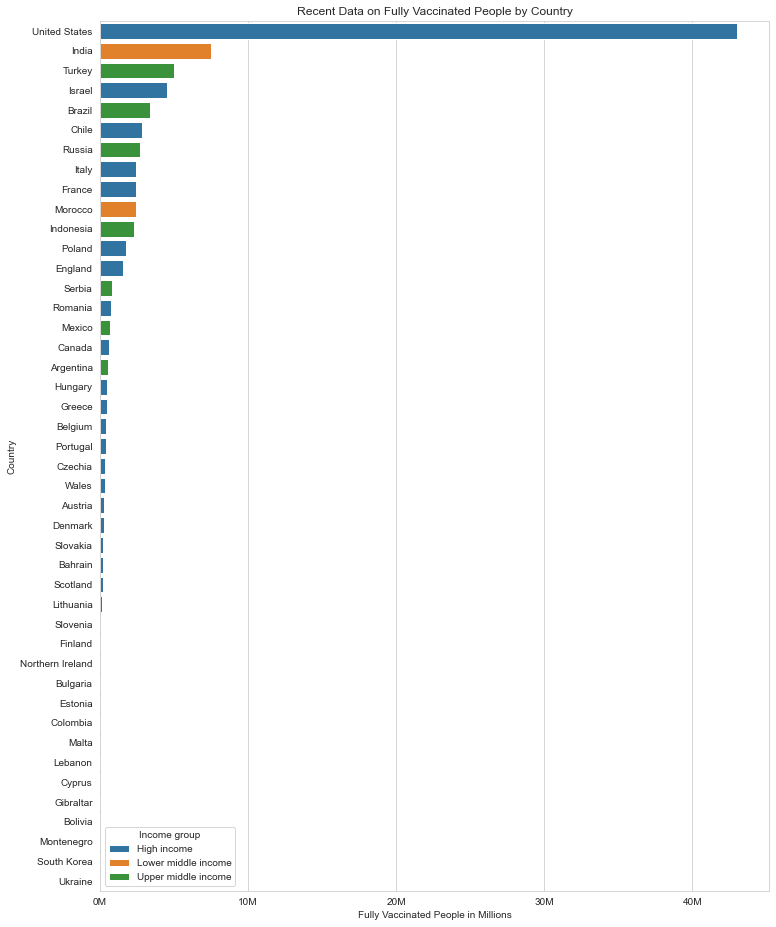

In [56]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= date, y= 'Entity', x= 'people_fully_vaccinated', 
            hue= 'Income group', dodge= False)
plt.title('Recent Data on Fully Vaccinated People by Country')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions');

The United States is vaccinating A LOT of individuals. We can't really see what is going on with the other countries, so let's zoom in and see how they're doing.

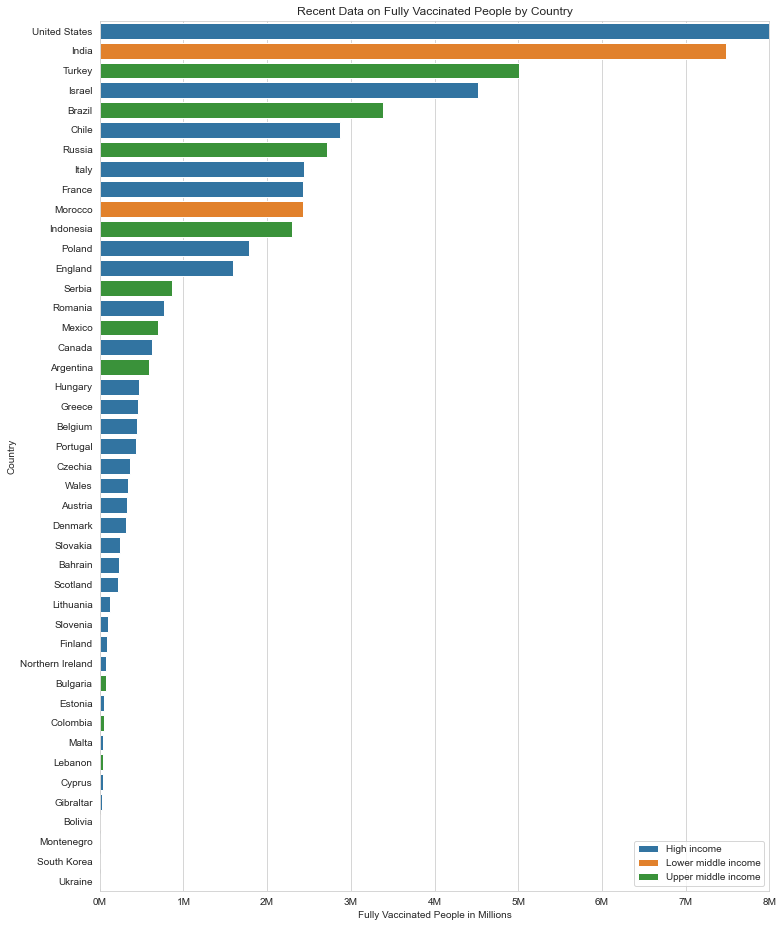

In [57]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= date, y= 'Entity', x= 'people_fully_vaccinated', 
            hue= 'Income group', dodge= False)
plt.title('Recent Data on Fully Vaccinated People by Country')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions')
plt.xlim(0, 8000000)
plt.legend(loc= 'lower right');

### Percent of Population Data

In [58]:
df = pd.read_csv('../data/owid-covid-data_updated.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79667 non-null  object 
 1   continent                              75781 non-null  object 
 2   location                               79667 non-null  object 
 3   date                                   79667 non-null  object 
 4   total_cases                            78097 non-null  float64
 5   new_cases                              78095 non-null  float64
 6   new_cases_smoothed                     77094 non-null  float64
 7   total_deaths                           68648 non-null  float64
 8   new_deaths                             68806 non-null  float64
 9   new_deaths_smoothed                    77094 non-null  float64
 10  total_cases_per_million                77673 non-null  float64
 11  ne

In [60]:
temp_df = df.loc[df['date'] == '2021-04-02']
one_day_df = temp_df.copy()

In [61]:
one_day_df['pop_vax_percent'] = round(one_day_df['people_fully_vaccinated'] / one_day_df['population'] *100, 2)
one_day_df = one_day_df.sort_values(by= ['pop_vax_percent', 'location'], ascending= False)[:35]

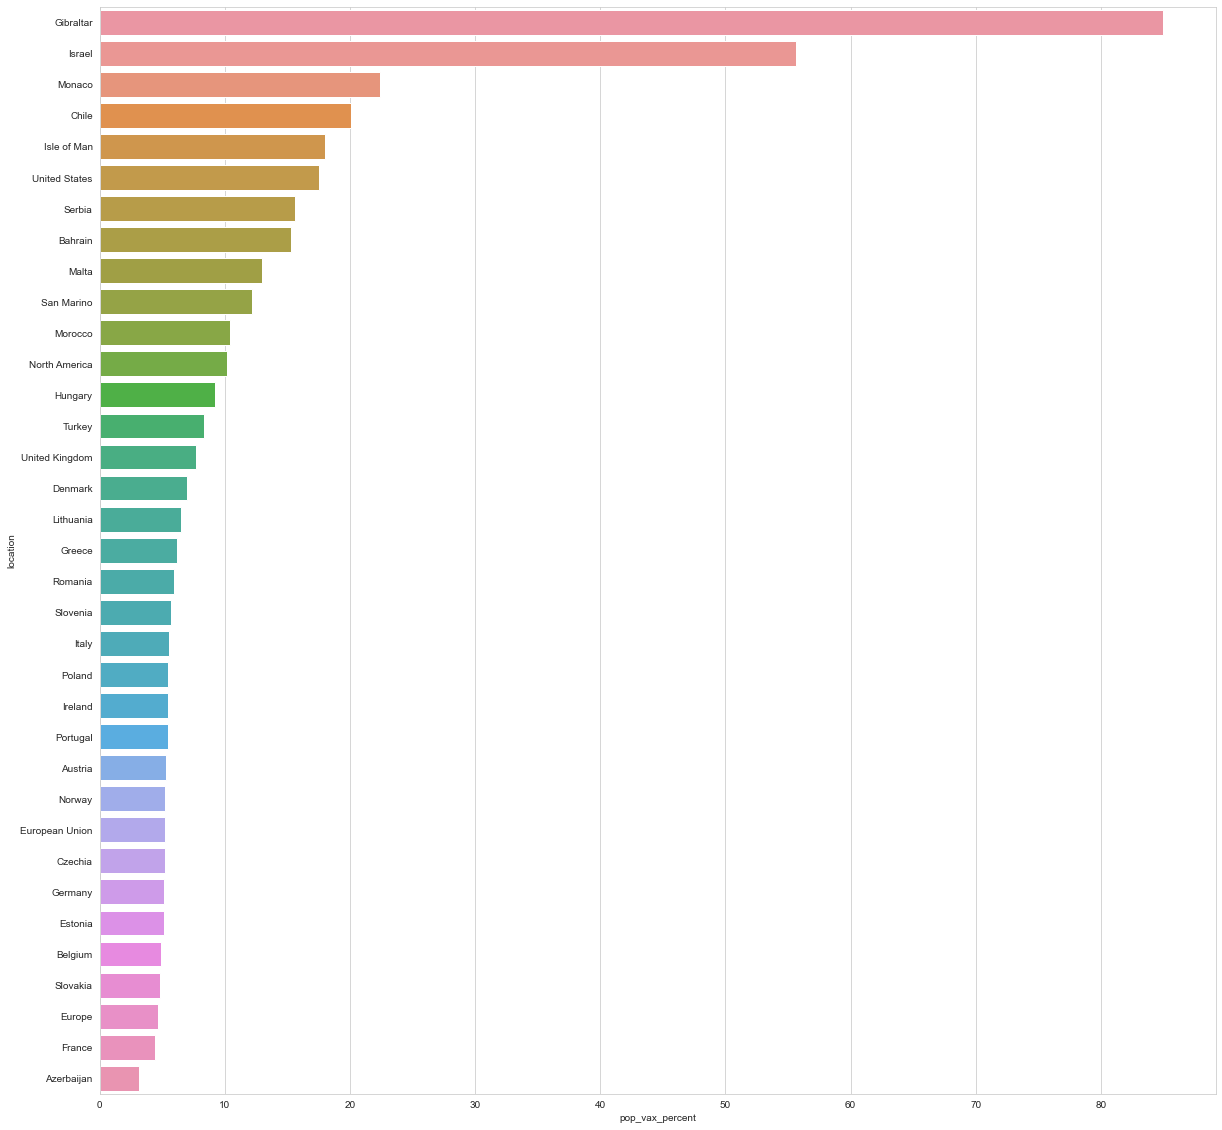

In [62]:
# plot to show percent of vaccinations
plt.figure(figsize= (20, 20))
sns.barplot(x = 'pop_vax_percent'[:25], y= 'location', data= one_day_df);

Gibraltar is leading the way with over 80% of it's residents being fully vaccinated. 
[This article](https://www.washingtonpost.com/world/2021/03/18/gibraltar-vaccine-coronavirus/) discusses how Gibraltar has finished administering vaccines to all adults that want one. 

Areas that are high on the list have a small population or vaccines readily accessible. Gibraltar has both a smaller population and access to vaccines from Britain.

# Notes / Excess:

In [63]:
# create error here so nothing below this runs
asdfasdfffff

NameError: name 'asdfasdfffff' is not defined

In [ ]:
fully_vax_df.plot(kind= 'kde', figsize= (16,6));

In [ ]:
# country_groups = fully_vax_df.groupby('Entity')
country_groups = fully_vax_df.copy()

In [ ]:
country_groups.drop(['Code'], axis= 1, inplace= True)

In [ ]:
country_groups = country_groups.groupby(pd.Grouper(freq = 'D'))

In [ ]:
country_groups.head()

In [ ]:
temp_day = pd.DataFrame()
for dy, country in country_groups:
    temp_day[dy.day] = country.values.ravel()
    
temp_day.plot(figsize= (22,15), subplots= False, legend= True)

In [ ]:
country_groups2 = country_groups.copy()

In [ ]:
country_groups2.cumsum()
plt.figure()
country_groups2.plot()

In [ ]:
country_groups2

In [ ]:
countries_df[(countries_df['Entity'] == 'United Kingdom') & (countries_df['Day'] == '2021-03-20')]

In [ ]:
UK_countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']

UK_total = [countries_df[(countries_df['Entity'] == (i)) & \
                         (countries_df['Day'] == '2021-03-20')] \
            for i in UK_countries]
UK_total

In [ ]:
total = 1591129 + 338959 + 220188 + 78496
total

# Market Segmentation with Worldwide COVID-19 Vaccinations

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

## Data Loading and Cleaning

In [2]:
data = pd.read_csv('../data/vaccinations_all.csv')

In [3]:
data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
0                                  NaN                             NaN  
1                                  NaN                            35.0  
2                                  NaN                            35.0  
3                                  NaN                            35.0  
4                                  NaN                            35.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             10782 non-null  object 
 1   iso_code                             10782 non-null  object 
 2   date                                 10782 non-null  object 
 3   total_vaccinations                   6807 non-null   float64
 4   people_vaccinated                    6183 non-null   float64
 5   people_fully_vaccinated              4448 non-null   float64
 6   daily_vaccinations_raw               5806 non-null   float64
 7   daily_vaccinations                   10591 non-null  float64
 8   total_vaccinations_per_hundred       6807 non-null   float64
 9   people_vaccinated_per_hundred        6183 non-null   float64
 10  people_fully_vaccinated_per_hundred  4448 non-null   float64
 11  daily_vaccinations_per_milli

In [5]:
data.isnull().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                     3975
people_vaccinated                      4599
people_fully_vaccinated                6334
daily_vaccinations_raw                 4976
daily_vaccinations                      191
total_vaccinations_per_hundred         3975
people_vaccinated_per_hundred          4599
people_fully_vaccinated_per_hundred    6334
daily_vaccinations_per_million          191
dtype: int64

In [6]:
#remove anything that isn't a country
# create list of things that are not countries 
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'World', 'United Kingdom']

data = data[~data['location'].isin(continents)]

In [7]:
data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Faeroe Islands', 'Falkland Islands', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece',
       'Greenland', 'Grenada', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Jamai

In [8]:
# drop columns that have been 'smoothed' or have some kind of calculation using 'per'
cols = [data.drop(columns= i, inplace= True) for i in data.columns if 'per' in i]

In [9]:
# fill null values with 0
data.fillna(0, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 10781
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 9926 non-null   object 
 1   iso_code                 9926 non-null   object 
 2   date                     9926 non-null   object 
 3   total_vaccinations       9926 non-null   float64
 4   people_vaccinated        9926 non-null   float64
 5   people_fully_vaccinated  9926 non-null   float64
 6   daily_vaccinations_raw   9926 non-null   float64
 7   daily_vaccinations       9926 non-null   float64
dtypes: float64(5), object(3)
memory usage: 697.9+ KB


### Add Country Income Data

In [10]:
# open file from World Bank that contains data on income classifications
country_incomes = pd.read_csv('../data/list-of-economies.csv', 
                              header= 4, index_col= False)
country_incomes

Unnamed: 0                                     Economy Code  \
0           1.0                                 Afghanistan  AFG   
1           2.0                                     Albania  ALB   
2           3.0                                     Algeria  DZA   
3           4.0                              American Samoa  ASM   
4           5.0                                     Andorra  AND   
..          ...                                         ...  ...   
261        42.0                          Sub-Saharan Africa  SSF   
262        43.0  Sub-Saharan Africa (excluding high income)  SSA   
263        44.0             Sub-Saharan Africa (IDA & IBRD)  TSS   
264        45.0                         Upper middle income  UMC   
265        46.0                                       World  WLD   

                         Region         Income group Lending category Other  
0                    South Asia           Low income              IDA  HIPC  
1         Europe & Central Asia  Upper middle income             IBRD   NaN  
2    Middle East & North Africa  Lower middle income             IBRD   NaN  
3           East Asia & Pacific  Upper middle income               ..   NaN  
4         Europe & Central Asia          High income               ..   NaN  
..                          ...                  ...              ...   ...  
261                         NaN                  NaN              NaN   NaN  
262                         NaN                  NaN              NaN   NaN  
263                         NaN                  NaN              NaN   NaN  
264                         NaN                  NaN              NaN   NaN  
265                         NaN                  NaN              NaN   NaN  

[266 rows x 7 columns]

In [11]:
# drop unnecessary / mostly empty columns
country_incomes.drop(columns= ['Unnamed: 0', 'Other', 'Lending category'], inplace= True)

In [12]:
# subset data and check it worked
country_incomes = country_incomes.iloc[:218]
country_incomes.tail()

Economy Code                      Region  \
213  Virgin Islands (U.S.)  VIR   Latin America & Caribbean   
214     West Bank and Gaza  PSE  Middle East & North Africa   
215            Yemen, Rep.  YEM  Middle East & North Africa   
216                 Zambia  ZMB          Sub-Saharan Africa   
217               Zimbabwe  ZWE          Sub-Saharan Africa   

            Income group  
213          High income  
214  Lower middle income  
215           Low income  
216  Lower middle income  
217  Lower middle income

In [13]:
country_incomes.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [14]:
country_incomes.isnull().sum()

Economy         0
Code            0
Region          0
Income group    0
dtype: int64

In [15]:
# merge dataframes
df = pd.merge(data, country_incomes, how= 'left', left_on= 'iso_code', right_on= 'Code')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9925
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 9926 non-null   object 
 1   iso_code                 9926 non-null   object 
 2   date                     9926 non-null   object 
 3   total_vaccinations       9926 non-null   float64
 4   people_vaccinated        9926 non-null   float64
 5   people_fully_vaccinated  9926 non-null   float64
 6   daily_vaccinations_raw   9926 non-null   float64
 7   daily_vaccinations       9926 non-null   float64
 8   Economy                  9045 non-null   object 
 9   Code                     9045 non-null   object 
 10  Region                   9045 non-null   object 
 11  Income group             9045 non-null   object 
dtypes: float64(5), object(7)
memory usage: 1008.1+ KB


In [16]:
# Income group must be filled in
# See which countries have null income group 
null_vals = df[df.isnull().any(axis= 1)]
null_vals.location.unique()

array(['Anguilla', 'England', 'Falkland Islands', 'Guernsey', 'Jersey',
       'Kosovo', 'Montserrat', 'Northern Cyprus', 'Northern Ireland',
       'Oceania', 'Saint Helena', 'Scotland', 'Wales'], dtype=object)

Research if Australia and Oceania have the same stats.

In [17]:
day = df[df['date'] == '2021-04-05']

In [18]:
df[(df['location'] == 'Oceania') & \
             (df['date'] == '2021-04-05')]

location  iso_code        date  total_vaccinations  people_vaccinated  \
6872  Oceania  OWID_OCE  2021-04-05            912975.0           211477.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
6872                  16483.0                  1127.0             47102.0   

     Economy Code Region Income group  
6872     NaN  NaN    NaN          NaN

In [19]:
df[(df['location'] == 'Australia') & \
             (df['date'] == '2021-04-05')]

location iso_code        date  total_vaccinations  people_vaccinated  \
459  Australia      AUS  2021-04-05            844309.0                0.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
459                      0.0                  1127.0             43221.0   

       Economy Code               Region Income group  
459  Australia  AUS  East Asia & Pacific  High income

From this, we see that Australia is collecting it's own stats that are combined with other countries to form Oceania.

The 14 countries within Oceania are listed in the income csv, but range from Solomon Islands and Papua New Guinea as lower middle, Fiji and Samoa as upper middle, and New Zealand and Australia as high.

Most of the countries are labeled 'Upper middle income', so we will replace the Income group with that.

In [20]:
# replace null values with correct values
df.loc[df['location'] == 'Oceania', ['Region', 'Income group']] = \
'East Asia & Pacific', 'Upper middle income'

In [21]:
df[df['location'] == 'Oceania'][:5]

location  iso_code        date  total_vaccinations  people_vaccinated  \
6823  Oceania  OWID_OCE  2021-02-15                 0.0                0.0   
6824  Oceania  OWID_OCE  2021-02-16                 0.0                0.0   
6825  Oceania  OWID_OCE  2021-02-17                 0.0                0.0   
6826  Oceania  OWID_OCE  2021-02-18                 0.0                0.0   
6827  Oceania  OWID_OCE  2021-02-19                30.0               30.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
6823                      0.0                     0.0                 0.0   
6824                      0.0                     0.0                 0.0   
6825                      0.0                     0.0                 0.0   
6826                      0.0                     0.0                 0.0   
6827                      0.0                    30.0                 8.0   

     Economy Code               Region         Income group  
6823     NaN  NaN  East Asia & Pacific  Upper middle income  
6824     NaN  NaN  East Asia & Pacific  Upper middle income  
6825     NaN  NaN  East Asia & Pacific  Upper middle income  
6826     NaN  NaN  East Asia & Pacific  Upper middle income  
6827     NaN  NaN  East Asia & Pacific  Upper middle income

Fill in Kosovo with it's respective stats and Northern Cyprus with Turkey's stats

In [22]:
df.loc[df['location'] == 'Northern Cyprus', ['Region', 'Income group']] = \
'Europe & Central Asia', 'Upper middle income'

In [23]:
df.loc[df['location'] == 'Kosovo', ['Region', 'Income group']] = \
'Europe & Central Asia', 'Upper middle income'

The rest of the countries are territories that belong to the UK. We will fill the stats in with UK information. See the EDA notebook for more information on the reasoning behind this.

In [24]:
df['Income group'].fillna('High income', inplace= True)
df['Region'].fillna('Europe & Central Asia', inplace= True)

In [25]:
df.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'KHM', 'CAN', 'CPV',
       'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE',
       'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'OWID_ENG', 'GNQ', 'EST',
       'FRO', 'FLK', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GUY', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN',
       'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS',
       'KWT', 'LAO', 'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC', 'MWI',
       'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO',
       'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NZL', 'NGA', 'MKD', 'OWID_CYN', 'OWID_NIR', 'NOR', 'OWID_OCE',
       'OMN', 'PAK', 'PSE', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT',
       'Q

The data source made up some codes that don't actually exist. To prevent any slip-ups, let's remove the "OWID_" so all entries have 3-letter codes.

In [26]:
df['iso_code'] = df['iso_code'].str.replace('OWID_', '')

In [27]:
df.drop(['Economy', 'Code'], axis= 1, inplace= True)

In [28]:
df.isnull().sum()

location                   0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
daily_vaccinations_raw     0
daily_vaccinations         0
Region                     0
Income group               0
dtype: int64

## PCA, K-Means, and Hierarchical Agglomerative Clustering

In [29]:
# deal with null / missing values
# PCA
# Cluster

<AxesSubplot:>

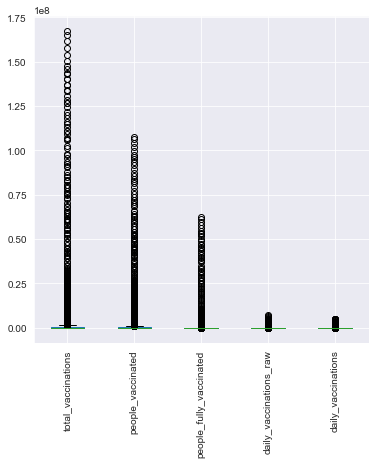

In [30]:
df.boxplot(figsize= (6,6), rot= 90)

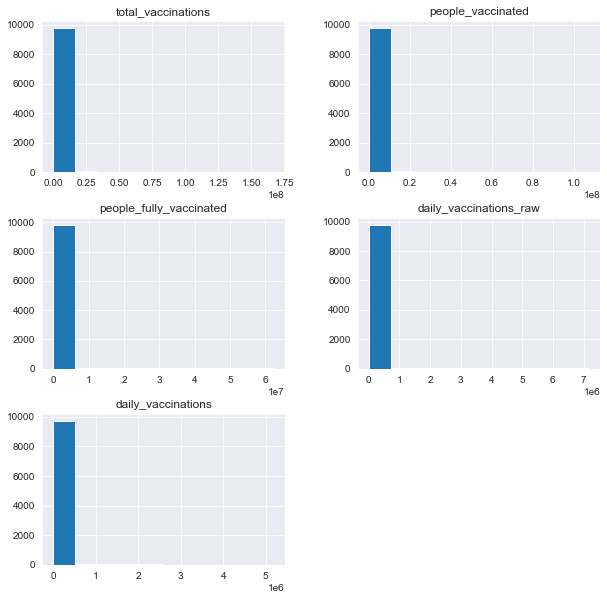

In [31]:
df.hist(figsize= (10,10));

<AxesSubplot:>

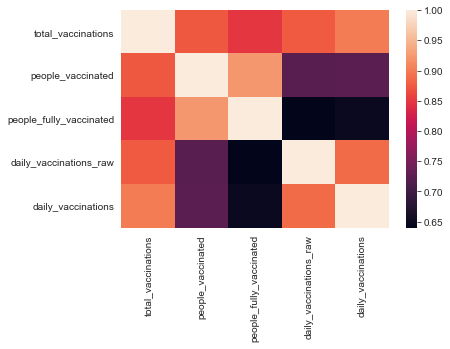

In [32]:
sns.heatmap(df.corr())

In [33]:
X = df.loc[:, df.dtypes == np.float64]

In [34]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [37]:
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

In [38]:
pca.components_

array([[ 0.47683762,  0.44962718,  0.42982688,  0.43707011,  0.4412254 ],
       [ 0.05187869, -0.42652824, -0.59396517,  0.48674978,  0.47503926],
       [ 0.20855127, -0.16826696,  0.04274221, -0.72985799,  0.62743367],
       [-0.34509287,  0.75498667, -0.50172215, -0.12025758,  0.21146877],
       [ 0.77932777,  0.13262889, -0.45705823, -0.15776499, -0.37585342]])

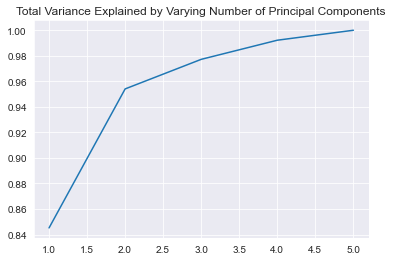

In [39]:
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principal Components');

In [40]:
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(scaled_X)

### K-Means Clustering

#### Determine Number of Clusters

*Elbow Plot*

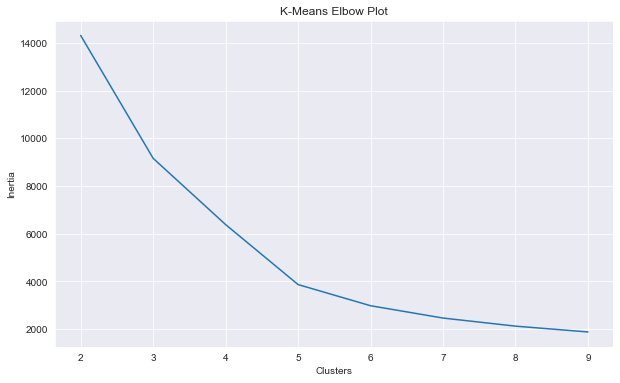

In [41]:
# find right amount of clusters
results = []
N = range(2,10)
for n in N:
    model = KMeans(n_clusters= n, random_state= 27)
    model.fit(X_pca)
    results.append(model.inertia_)
    
# plot elbow plot
plt.figure(figsize= (10, 6))
plt.plot(N, results)
plt.title('K-Means Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

*Silhouette Score*

In [42]:
# determine silhouette score and see which number is highest
for n_cluster in range(2,10):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.9703
Silhouette Score for 3 Clusters: 0.9632
Silhouette Score for 4 Clusters: 0.9563
Silhouette Score for 5 Clusters: 0.8710
Silhouette Score for 6 Clusters: 0.8671
Silhouette Score for 7 Clusters: 0.8527
Silhouette Score for 8 Clusters: 0.8428
Silhouette Score for 9 Clusters: 0.8014


K-Means using 5 clusters

In [43]:
# unscaled, original data
k_means_orig = KMeans(n_clusters = 5)
y_preds_orig = k_means_orig.fit_predict(X)

CH_score = calinski_harabasz_score(X, y_preds_orig)
CH_score

30587.533539425414

In [44]:
len(y_preds_orig)

9926

In [45]:
# scaled data
k_means = KMeans(n_clusters = 5)
y_preds_scaled = k_means.fit_predict(scaled_X)

CH_score = calinski_harabasz_score(scaled_X, y_preds_scaled)
CH_score

18971.419097740334

In [46]:
# pca and scaled data
k_means_pca = KMeans(n_clusters = 5)
y_preds_pca = k_means_pca.fit_predict(X_pca)

CH_score = calinski_harabasz_score(X_pca, y_preds_pca)
CH_score

27859.70563761243

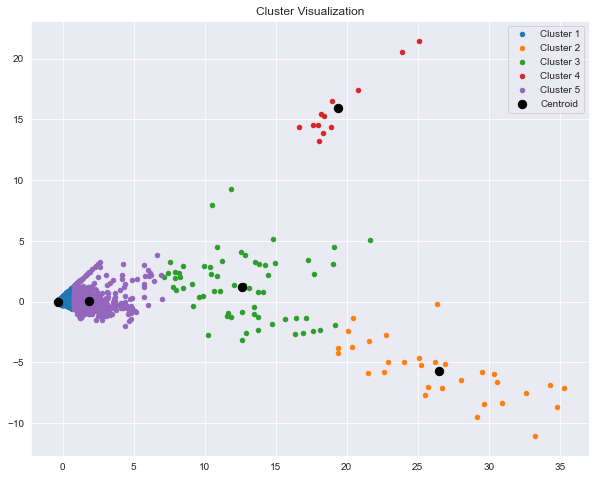

In [47]:
# visualize the clusters
plt.subplots(figsize= (10, 8))
plt.scatter(X_pca[y_preds_pca == 0, 0], X_pca[y_preds_pca == 0, 1], s= 20, label= 'Cluster 1')
plt.scatter(X_pca[y_preds_pca == 1, 0], X_pca[y_preds_pca == 1, 1], s= 20, label= 'Cluster 2')
plt.scatter(X_pca[y_preds_pca == 2, 0], X_pca[y_preds_pca == 2, 1], s= 20, label= 'Cluster 3')
plt.scatter(X_pca[y_preds_pca == 3, 0], X_pca[y_preds_pca == 3, 1], s= 20, label= 'Cluster 4')
plt.scatter(X_pca[y_preds_pca == 4, 0], X_pca[y_preds_pca == 4, 1], s= 20, label= 'Cluster 5')

plt.scatter(k_means_pca.cluster_centers_[:, 0], 
            k_means_pca.cluster_centers_[:, 1], 
            s= 70, c= 'black', label= 'Centroid')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

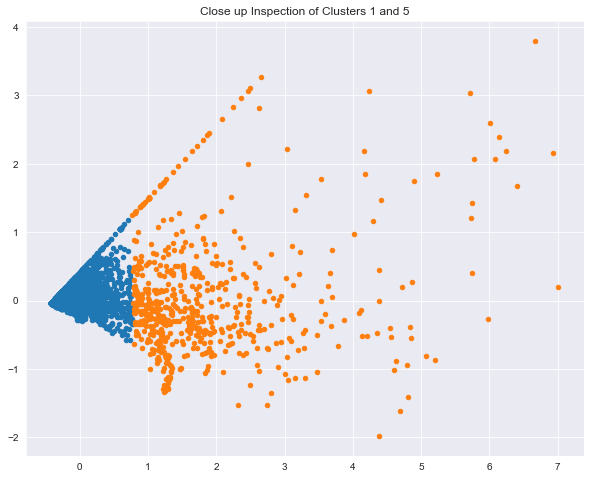

In [48]:
plt.subplots(figsize= (10, 8))
plt.scatter(X_pca[y_preds_pca == 0, 0], X_pca[y_preds_pca == 0, 1], s= 20, label= 'Cluster 1')
plt.scatter(X_pca[y_preds_pca == 4, 0], X_pca[y_preds_pca == 4, 1], s= 20, label= 'Cluster 5')
plt.title('Close up Inspection of Clusters 1 and 5');

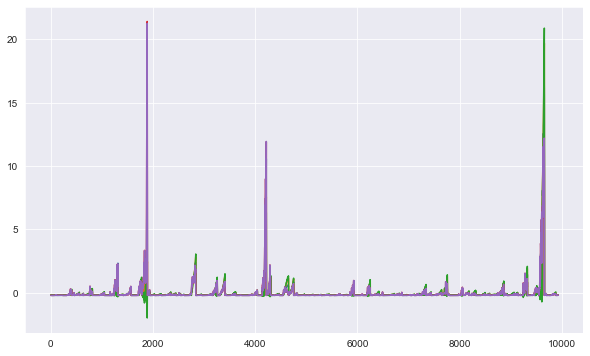

In [49]:
# reprojecting compressed data 
plt.figure(figsize= (10,6))
plt.plot(pca.inverse_transform(X_pca));

In [50]:
cluster_df = df.copy()
cluster_df['cluster'] = y_preds_pca

cluster_df[cluster_df.cluster == 0]

location iso_code        date  total_vaccinations  people_vaccinated  \
0     Afghanistan      AFG  2021-02-22                 0.0                0.0   
1     Afghanistan      AFG  2021-02-23                 0.0                0.0   
2     Afghanistan      AFG  2021-02-24                 0.0                0.0   
3     Afghanistan      AFG  2021-02-25                 0.0                0.0   
4     Afghanistan      AFG  2021-02-26                 0.0                0.0   
...           ...      ...         ...                 ...                ...   
9921     Zimbabwe      ZWE  2021-03-30             85866.0            72944.0   
9922     Zimbabwe      ZWE  2021-03-31             91880.0            76995.0   
9923     Zimbabwe      ZWE  2021-04-01            105307.0            87791.0   
9924     Zimbabwe      ZWE  2021-04-02            124753.0           103815.0   
9925     Zimbabwe      ZWE  2021-04-03            132915.0           111588.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         0.0                     0.0                 0.0   
1                         0.0                     0.0              1367.0   
2                         0.0                     0.0              1367.0   
3                         0.0                     0.0              1367.0   
4                         0.0                     0.0              1367.0   
...                       ...                     ...                 ...   
9921                  12922.0                  4256.0              5810.0   
9922                  14885.0                  6014.0              5712.0   
9923                  17516.0                 13427.0              6617.0   
9924                  20938.0                 19446.0              8156.0   
9925                  21327.0                  8162.0              8498.0   

                  Region         Income group  cluster  
0             South Asia           Low income        0  
1             South Asia           Low income        0  
2             South Asia           Low income        0  
3             South Asia           Low income        0  
4             South Asia           Low income        0  
...                  ...                  ...      ...  
9921  Sub-Saharan Africa  Lower middle income        0  
9922  Sub-Saharan Africa  Lower middle income        0  
9923  Sub-Saharan Africa  Lower middle income        0  
9924  Sub-Saharan Africa  Lower middle income        0  
9925  Sub-Saharan Africa  Lower middle income        0  

[9222 rows x 11 columns]

In [51]:
cluster_df.to_csv('data/countries_clusters.csv', index= False)

### Plot Clusters on Map

In [52]:
# plot map of clusters

fig = go.Figure(data= go.Choropleth(
    locations= cluster_df['iso_code'], 
    z= cluster_df['cluster'], 
    text= cluster_df['location'], 
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'PCA Cluster',))

fig.update_layout(
    title_text='PCA Cluster by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

We can see that K-Means clustered the United States, China, and India separately. Then it gathered various countries into the other two clusters. We can also see that we do not have data for some countries. It is more than likely that these countries have not begun vaccinating residents, or have not reported their data.

In [53]:
cluster_df.sort_values(by = ['date', 'daily_vaccinations'], ascending= False)[:20]

location iso_code        date  total_vaccinations  \
1889                 China      CHN  2021-04-05         142802000.0   
4216                 India      IND  2021-04-05          83110926.0   
9656         United States      USA  2021-04-05         167187795.0   
1313                Brazil      BRA  2021-04-05          21960953.0   
5931                Mexico      MEX  2021-04-05           9287405.0   
9324                Turkey      TUR  2021-04-05          16993574.0   
4751                 Italy      ITA  2021-04-05          11252066.0   
1570                Canada      CAN  2021-04-05           6555389.0   
8863                 Spain      ESP  2021-04-05           8743694.0   
1777                 Chile      CHL  2021-04-05          11060230.0   
7758                Russia      RUS  2021-04-05          12215342.0   
8068          Saudi Arabia      SAU  2021-04-05           5114583.0   
4040               Hungary      HUN  2021-04-05           3355199.0   
409              Argentina      ARG  2021-04-05           4260808.0   
6250               Morocco      MAR  2021-04-05           8303056.0   
9549  United Arab Emirates      ARE  2021-04-05           8596722.0   
6872               Oceania      OCE  2021-04-05            912975.0   
4823                 Japan      JPN  2021-04-05           1196884.0   
459              Australia      AUS  2021-04-05            844309.0   
637             Azerbaijan      AZE  2021-04-05            947947.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
1889                0.0                      0.0               2832000.0   
4216         72277309.0               10833617.0               4005763.0   
9656        107515428.0               62392065.0               2134049.0   
1313         17128933.0                4832020.0                890825.0   
5931          8113230.0                1174175.0                251405.0   
9324          9796506.0                7197068.0                310507.0   
4751          7770638.0                3481428.0                160628.0   
1570          5836927.0                 718462.0                183279.0   
8863          5890888.0                2852806.0                     0.0   
1777          7017559.0                4042671.0                268597.0   
7758          7576640.0                4638702.0                 94532.0   
8068                0.0                      0.0                120007.0   
4040          2432313.0                 922886.0                 79348.0   
409           3576423.0                 684385.0                 26303.0   
6250          4352033.0                3951023.0                     0.0   
9549                0.0                      0.0                 17743.0   
6872           211477.0                  16483.0                  1127.0   
4823           956638.0                 240246.0                     0.0   
459                 0.0                      0.0                  1127.0   
637            591012.0                 356935.0                   202.0   

      daily_vaccinations                      Region         Income group  \
1889           4548571.0         East Asia & Pacific  Upper middle income   
4216           3142510.0                  South Asia  Lower middle income   
9656           3053566.0               North America          High income   
1313            554114.0   Latin America & Caribbean  Upper middle income   
5931            324137.0   Latin America & Caribbean  Upper middle income   
9324            292045.0       Europe & Central Asia  Upper middle income   
4751            219121.0       Europe & Central Asia          High income   
1570            179165.0               North America          High income   
8863            167465.0       Europe & Central Asia          High income   
1777            162239.0   Latin America & Caribbean          High income   
7758            155856.0       Europe & Central Asia  Upper middle income   
8068 

The first 3 countries have daily vaccinations in the millions. The countries with the 4th through 11th highest daily vaccination are ranked together as well in the fourth cluster. That seems to have been a promising feature for the clusters, though not the only feature it was considering as Israel is in the fourth cluster but not in the top 20 for daily vaccinations.

In [54]:
cluster_df.sort_values(by = ['date', 'total_vaccinations'], ascending= False)[:20]

location iso_code        date  total_vaccinations  \
9656         United States      USA  2021-04-05         167187795.0   
1889                 China      CHN  2021-04-05         142802000.0   
4216                 India      IND  2021-04-05          83110926.0   
1313                Brazil      BRA  2021-04-05          21960953.0   
9324                Turkey      TUR  2021-04-05          16993574.0   
7758                Russia      RUS  2021-04-05          12215342.0   
4751                 Italy      ITA  2021-04-05          11252066.0   
1777                 Chile      CHL  2021-04-05          11060230.0   
4651                Israel      ISR  2021-04-05          10139337.0   
5931                Mexico      MEX  2021-04-05           9287405.0   
8863                 Spain      ESP  2021-04-05           8743694.0   
9549  United Arab Emirates      ARE  2021-04-05           8596722.0   
6250               Morocco      MAR  2021-04-05           8303056.0   
1570                Canada      CAN  2021-04-05           6555389.0   
813             Bangladesh      BGD  2021-04-05           5539494.0   
8068          Saudi Arabia      SAU  2021-04-05           5114583.0   
409              Argentina      ARG  2021-04-05           4260808.0   
4040               Hungary      HUN  2021-04-05           3355199.0   
8311                Serbia      SRB  2021-04-05           2593838.0   
7442              Portugal      PRT  2021-04-05           1907551.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
9656        107515428.0               62392065.0               2134049.0   
1889                0.0                      0.0               2832000.0   
4216         72277309.0               10833617.0               4005763.0   
1313         17128933.0                4832020.0                890825.0   
9324          9796506.0                7197068.0                310507.0   
7758          7576640.0                4638702.0                 94532.0   
4751          7770638.0                3481428.0                160628.0   
1777          7017559.0                4042671.0                268597.0   
4651          5277886.0                4861451.0                 29580.0   
5931          8113230.0                1174175.0                251405.0   
8863          5890888.0                2852806.0                     0.0   
9549                0.0                      0.0                 17743.0   
6250          4352033.0                3951023.0                     0.0   
1570          5836927.0                 718462.0                183279.0   
813           5539494.0                      0.0                 41322.0   
8068                0.0                      0.0                120007.0   
409           3576423.0                 684385.0                 26303.0   
4040          2432313.0                 922886.0                 79348.0   
8311          1481015.0                1112823.0                 26146.0   
7442          1330752.0                 576799.0                  1607.0   

      daily_vaccinations                      Region         Income group  \
9656           3053566.0               North America          High income   
1889           4548571.0         East Asia & Pacific  Upper middle income   
4216           3142510.0                  South Asia  Lower middle income   
1313            554114.0   Latin America & Caribbean  Upper middle income   
9324            292045.0       Europe & Central Asia  Upper middle income   
7758            155856.0       Europe & Central Asia  Upper middle income   
4751            219121.0       Europe & Central Asia          High income   
1777            162239.0   Latin America & Caribbean          High income   
4651             23194.0  Middle East & North Africa          High income   
5931            324137.0   Latin America & Caribbean  Upper middle income   
8863            167465.0       Europe & Central Asia          High income   
9549 

It will be interesting to watch as the next months unfold and hopefully vaccinations are able to reach areas that are yet unreported in this data.

### Hierarchical Agglomerative Clustering

In [55]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_orig = hac.fit_predict(X)
hac_preds_orig = hac.labels_

CH_score = calinski_harabasz_score(X, hac_preds_orig)
CH_score

29130.77029296543

In [56]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_scaled = hac.fit_predict(scaled_X)
hac_preds_scaled = hac.labels_

CH_score = calinski_harabasz_score(scaled_X, hac_preds_scaled)
CH_score

17361.548111095744

In [57]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_pca = hac.fit_predict(X_pca)
hac_preds_pca = hac.labels_

CH_score = calinski_harabasz_score(X_pca, hac_preds_pca)
CH_score

24492.134338323347

In [58]:
hac = AgglomerativeClustering(n_clusters= 2)
hac.fit_predict(X_pca)
hac_preds_pca = hac.labels_

CH_score = calinski_harabasz_score(X_pca, hac_preds_pca)
CH_score

20068.3591572557

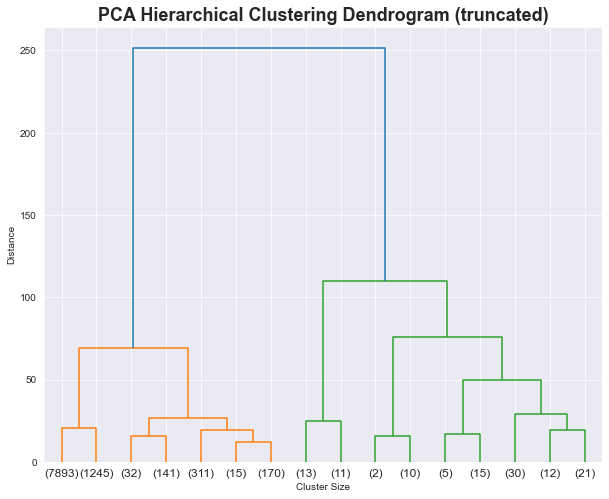

In [59]:
# plot pca dendrogram
plt.figure(figsize= (10, 8))
linkage_array = ward(X_pca)
dendrogram(linkage_array, truncate_mode= 'lastp', p = 16)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('PCA Hierarchical Clustering Dendrogram (truncated)', fontsize = 18, fontweight= 'bold');